### Positional Analogue Scanning
This notebook accompanies my blog post on [Positional Analogue Scanning](https://practicalcheminformatics.blogspot.com/2020/04/positional-analogue-scanning.html), which was inspired by Pennington, L.D., Aquila, B.M., Choi, Y., Valiulin, R.A. and Muegge, I., "Positional Analogue Scanning: An Effective Strategy for Multiparameter Optimization in Drug Design", [Journal of Medicinal Chemistry (2020)](https://pubs.acs.org/doi/abs/10.1021/acs.jmedchem.9b02092). 

#### Setup 
Install the necessary Python libraries

In [2]:
!pip install rdkit_pypi mols2grid

Import the necessary Python libraries

In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from itertools import combinations
import mols2grid

A setting to make the chemical structures look better. 

In [4]:
rdDepictor.SetPreferCoordGen(True)

#### Define the Input Molecule
Define the starting molecule

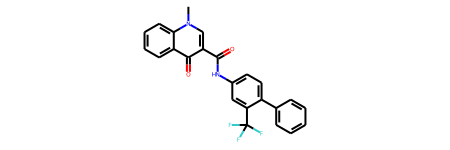

In [5]:
smiles = "CN1C=C(C(=O)Nc2ccc(-c3ccccc3)c(c2)C(F)(F)F)C(=O)c2ccccc12"
my_mol = Chem.MolFromSmiles(smiles)
my_mol

#### Define an alignment template
It will be much easier to visualize the results of our positional analgoue scan if the structures are aligned.  In order to align the structures, we'll use an SD file with coordinates. 

In [6]:
tmplt_molfile = """
  Mrv2006 04272015282D          

 30 33  0  0  0  0            999 V2000
   -1.2244   -2.8420    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8627   -2.1005    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3241   -1.4165    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1471   -1.4741    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5087   -2.2156    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0474   -2.8996    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0397   -2.0429    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    1.1015   -1.1830    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    0.2827   -1.2835    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    0.4568   -2.7018    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    1.2756   -2.6013    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    1.5980   -1.8418    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    2.4159   -1.7342    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    2.7316   -0.9719    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    3.5495   -0.8643    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    2.2294   -0.3175    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    5.1506   -0.4651    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    4.5775    0.1284    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    3.7770   -0.0713    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    4.1227   -1.4577    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    4.9232   -1.2581    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    3.8953   -2.2508    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    5.9475   -0.2516    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    5.5204   -1.8454    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    6.3173   -1.6318    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    6.5308   -0.8349    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    0.0797   -3.3175    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.5819   -3.9720    0.0000 F   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7172   -3.5310    0.0000 F   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2360   -4.0797    0.0000 F   0  0  0  0  0  0  0  0  0  0  0  0
 23 26  8  0  0  0  0
 25 26  8  0  0  0  0
 24 25  8  0  0  0  0
 21 24  8  0  0  0  0
 23 17  8  0  0  0  0
 20 22  8  0  0  0  0
 17 21  8  0  0  0  0
 20 21  8  0  0  0  0
 15 20  8  0  0  0  0
 19 15  8  0  0  0  0
 18 19  8  0  0  0  0
 17 18  8  0  0  0  0
 14 16  8  0  0  0  0
 14 15  8  0  0  0  0
 13 14  8  0  0  0  0
 12 13  8  0  0  0  0
  8 12  8  0  0  0  0
 11 12  8  0  0  0  0
 10 11  8  0  0  0  0
  7 10  8  0  0  0  0
  9  7  8  0  0  0  0
  8  9  8  0  0  0  0
  2  7  8  0  0  0  0
  1  6  8  0  0  0  0
  5  6  8  0  0  0  0
  4  5  8  0  0  0  0
  3  4  8  0  0  0  0
  2  3  8  0  0  0  0
  1  2  8  0  0  0  0
 27 29  1  0  0  0  0
 27 30  1  0  0  0  0
 27 28  1  0  0  0  0
 27 10  1  0  0  0  0
M  END
"""

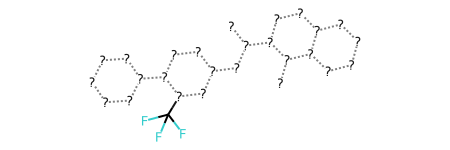

In [7]:
tmplt_mol = Chem.MolFromMolBlock(tmplt_molfile)
tmplt_mol

Check the template to make sure it works

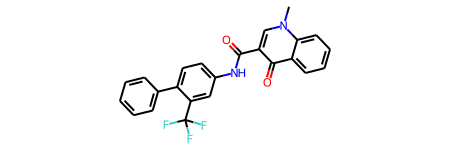

In [8]:
AllChem.GenerateDepictionMatching2DStructure(my_mol,tmplt_mol)
my_mol

#### Define a Function to Perform a Nitrogen Walk
Define a function to replace aromatic carbon atoms with nitrogen. 

In [9]:
def nitrogen_walk(mol_in, num_N=1):
    """
    Perform positional analogue scanning to sequentially replace aromatic cH wth n
    :param mol_in: input molecule
    :param num_N: number of nitrogens to replace in each analogue
    :return: list of analogue molecules
    """
    out_mol_list = []
    used = set()
    aromatic_cH = Chem.MolFromSmarts("[cH]")
    match_atms = [x[0] for x in mol_in.GetSubstructMatches(aromatic_cH)]
    n_combos = combinations(match_atms, num_N)
    for combo in n_combos:
        new_mol = Chem.RWMol(mol_in)
        for idx in combo:
            atm = new_mol.GetAtomWithIdx(idx)
            atm.SetAtomicNum(7)
        smi = Chem.MolToSmiles(new_mol)
        if smi not in used:
            used.add(smi)
            out_mol_list.append(new_mol)
    return out_mol_list

Generate a set of positional analogues where each aronmatic carbon is replaced by nitrogen

In [19]:
n_mol_list = nitrogen_walk(my_mol,1)

Display the structures.  First, we'll align to the template, then we'll use mols2grid to display the structures.  Since the structures already have coordinates we'll set **use_coords**, **prerender**, and **substruct_highlight** in mols2grid to indicate that we're using pre-generated coordinates. 

In [20]:
[AllChem.GenerateDepictionMatching2DStructure(x,tmplt_mol) for x in n_mol_list]
mols2grid.display(n_mol_list,use_coords=True,prerender=True,substruct_highlight=False)

Define a function to "walk" an atom (typically F or methyl) around a molecule

In [21]:
def attach_atom(mol_in, atomic_symbol="F", smarts="[cH]", num_sub=1):
    """
    Perform positional analogue scanning to sequentially add a single atom substituent 
    :param mol_in: input molecule
    :param atomic_symbol: symbol for atom to be attached
    :param smarts: smarts defining the position to be substituted
    :param num_sub: number of groups to substitute at each iteration
    :return: 
    """
    pt = Chem.GetPeriodicTable()
    atomic_num = pt.GetAtomicNumber(atomic_symbol)
    out_mol_list = []
    used = set()
    query = Chem.MolFromSmarts(smarts)
    match_atms = [x[0] for x in mol_in.GetSubstructMatches(query)]
    n_combos = combinations(match_atms, num_sub)
    for combo in n_combos:
        new_mol = Chem.RWMol(mol_in)
        for idx in combo:
            new_idx = new_mol.AddAtom(Chem.Atom(atomic_num))
            new_mol.AddBond(idx, new_idx, order=Chem.rdchem.BondType.SINGLE)
        Chem.SanitizeMol(new_mol)
        smi = Chem.MolToSmiles(new_mol)
        if smi not in used:
            used.add(smi)
            out_mol_list.append(new_mol)
    return out_mol_list

Generate a set of positional analogues where each aromatic "cH" is replaced by fluorine

In [22]:
fluoro_mol_list = attach_atom(my_mol)
[AllChem.GenerateDepictionMatching2DStructure(x,tmplt_mol) for x in fluoro_mol_list]
mols2grid.display(fluoro_mol_list,use_coords=True,prerender=True,substruct_highlight=False)

Generate a set of positional analogues where all pairs of aromatic "cH" are replaced by methyl groups.  

In [23]:
methyl_mol_list = attach_atom(my_mol, atomic_symbol="C", num_sub=2)
[AllChem.GenerateDepictionMatching2DStructure(x,tmplt_mol) for x in methyl_mol_list]
mols2grid.display(methyl_mol_list,use_coords=True,prerender=True,substruct_highlight=False)